### Importing Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Loading MNIST data

In [2]:
with np.load('./mnist.npz') as data:
    X_train = data['x_train']
    y_train = data['y_train']
    X_test = data['x_test']
    y_test = data['y_test']

### Preprocess the data

In [3]:
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

### Split training data into training and validation sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Initialize weights

In [17]:
def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

### Activation functions

In [7]:
def relu(Z):
    return np.maximum(0, Z)
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)

### Forward propagation

In [8]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

### Backward propagation

In [9]:
def backward_propagation(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[0]
    
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2

### Update weights

In [12]:
def update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

### Training function with validation

In [13]:
def train(X_train, y_train, X_val, y_val, hidden_size, learning_rate, epochs):
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)
    
    training_loss = []
    validation_loss = []
    training_accuracy = []
    validation_accuracy = []
    
    for epoch in range(epochs):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)
        Z1_val, A1_val, Z2_val, A2_val = forward_propagation(X_val, W1, b1, W2, b2)
        
        # Loss calculation
        train_loss = -np.mean(y_train * np.log(A2))
        val_loss = -np.mean(y_val * np.log(A2_val))
        
        # Accuracy calculation
        train_acc = accuracy(np.argmax(A2, axis=1), np.argmax(y_train, axis=1))
        val_acc = accuracy(np.argmax(A2_val, axis=1), np.argmax(y_val, axis=1))
        
        training_loss.append(train_loss)
        validation_loss.append(val_loss)
        training_accuracy.append(train_acc)
        validation_accuracy.append(val_acc)
        
        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X_train, y_train, Z1, A1, Z2, A2, W1, W2)
        
        # Update weights
        W1, b1, W2, b2 = update_weights(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')
    
    return W1, b1, W2, b2, training_loss, validation_loss, training_accuracy, validation_accuracy

In [14]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

In [15]:
def accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true)

### Train the model

In [18]:
hidden_size = 128
learning_rate = 0.1
epochs = 100
W1, b1, W2, b2, train_loss, val_loss, train_acc, val_acc = train(X_train,
                                                                 y_train,
                                                                 X_val,
                                                                 y_val,
                                                                 hidden_size,
                                                                 learning_rate,
                                                                 epochs)

Epoch 0, Training Loss: 0.2303, Validation Loss: 0.2303, Training Accuracy: 0.0888, Validation Accuracy: 0.0864
Epoch 10, Training Loss: 0.2288, Validation Loss: 0.2289, Training Accuracy: 0.2841, Validation Accuracy: 0.2835
Epoch 20, Training Loss: 0.2263, Validation Loss: 0.2263, Training Accuracy: 0.3034, Validation Accuracy: 0.3039
Epoch 30, Training Loss: 0.2209, Validation Loss: 0.2210, Training Accuracy: 0.3368, Validation Accuracy: 0.3363
Epoch 40, Training Loss: 0.2107, Validation Loss: 0.2108, Training Accuracy: 0.4240, Validation Accuracy: 0.4245
Epoch 50, Training Loss: 0.1940, Validation Loss: 0.1942, Training Accuracy: 0.5599, Validation Accuracy: 0.5610
Epoch 60, Training Loss: 0.1708, Validation Loss: 0.1711, Training Accuracy: 0.6609, Validation Accuracy: 0.6602
Epoch 70, Training Loss: 0.1450, Validation Loss: 0.1453, Training Accuracy: 0.7068, Validation Accuracy: 0.7066
Epoch 80, Training Loss: 0.1226, Validation Loss: 0.1228, Training Accuracy: 0.7416, Validation A

### Test the model

In [19]:
y_pred = predict(X_test, W1, b1, W2, b2)
test_accuracy = accuracy(y_pred, np.argmax(y_test, axis=1))
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7955


### Plotting loss and accuracy

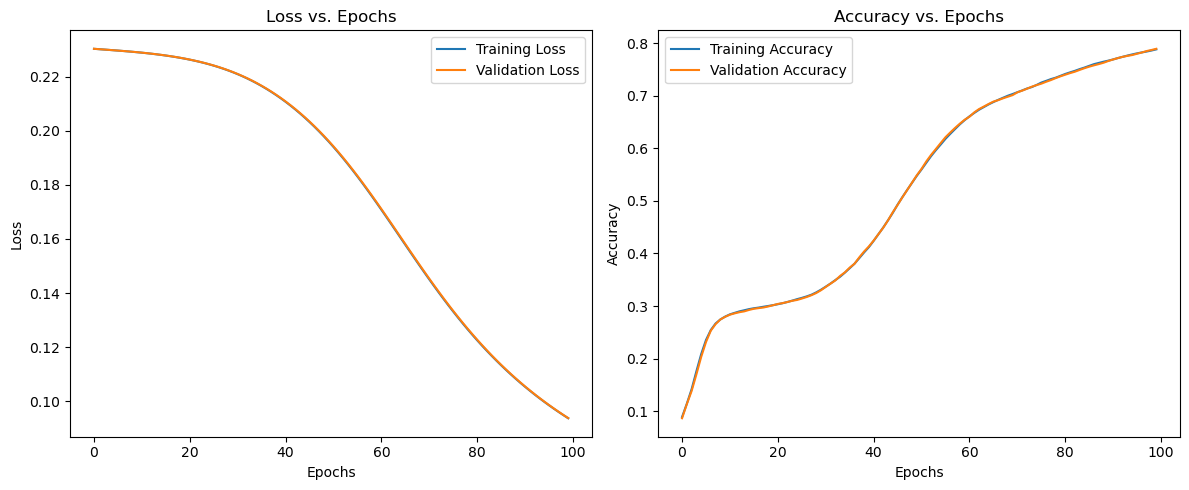

In [20]:
def plot_metrics(train_loss, val_loss, train_acc, val_acc):
    epochs = len(train_loss)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(epochs), train_loss, label='Training Loss')
    plt.plot(range(epochs), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), train_acc, label='Training Accuracy')
    plt.plot(range(epochs), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(train_loss, val_loss, train_acc, val_acc)